<a href="https://colab.research.google.com/github/jeffvun/Bio-Informatics-Exercises/blob/main/Practice_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practice 4: Multiclass Classification using Logistic Regression**

### **Loading Dataset**

In [1]:
fetal_health <- read.csv("/content/Fetal Health Dataset.csv")

In [4]:
sprintf("The dataset has %s records with a total of %s variables", nrow(fetal_health), ncol(fetal_health))

[1] "The dataset has 2126 records with a total of 22 variables"

### **Sampling Dataset**

Extracting 10% of the total dataset: This for demonstrating how classification is done. But ordinarily
the entire dataset should be used when using high computing devices.

In [6]:
fd_sub <-fetal_health[sample(1:nrow(fetal_health), 0.1*(2126), replace = FALSE ), ]

To understand the new dataset

In [7]:
sprintf("The dataset has %s records with a total of %s variables", nrow(fd_sub), ncol(fd_sub))

[1] "The dataset has 212 records with a total of 22 variables"

In [8]:
tab1 <- prop.table(table(fd_sub$fetal_health))

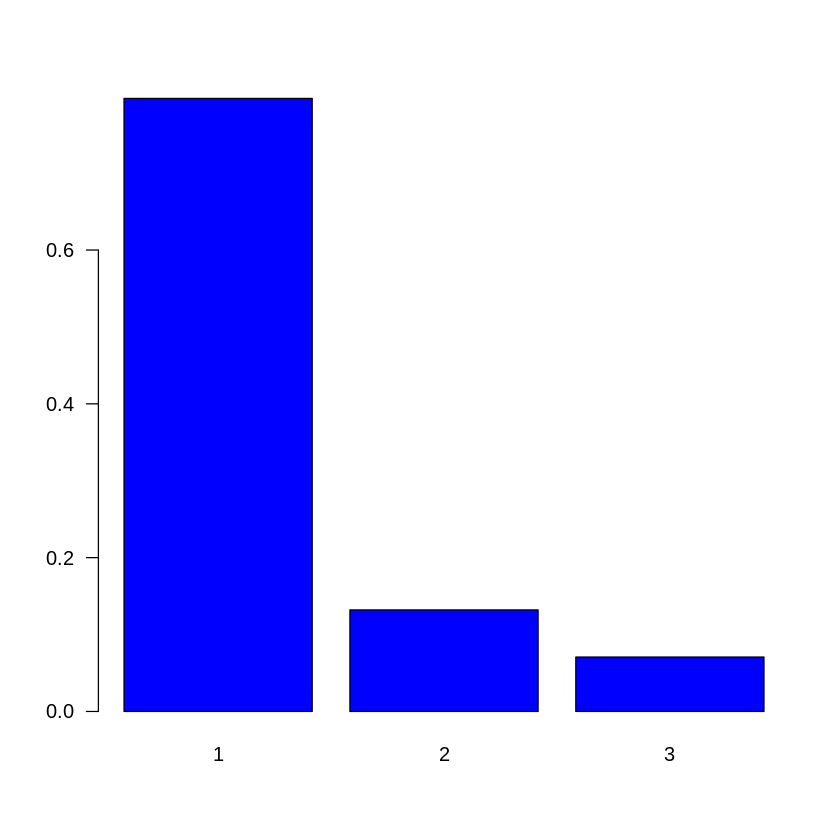

In [10]:
barplot (tab1, las=1, col="Blue")

### **Modelling**

The objective is to model say:
P(fetal_health)=f(acceleration, light_acceleartion, severe_acceleration,
prolongued_accelation)
We can view/explore the data on fetal_health using the table function as
follow:

In [11]:
table(fd_sub$fetal_health)


  1   2   3 
169  28  15 

The table shows the number of fetals that were grouped in the three classes.
We can explore for each of the variables used in the model to have a clear
impression of how the grouping occurs e.g.

In [12]:
table(fd_sub$accelerations)


    0 0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009  0.01 0.011 0.012 
   83    18    14    15    13    11    12     9    16     6     4     4     3 
0.014 0.016 0.017 
    2     1     1 

### **Clustering**

Next, we need to investigate if we can use the proposed model to class the
data into the three classes. This requires fitting the data into the model using
the nnet package. We therefore start by first installing the nnet package. i.e.

In [13]:
install.packages("nnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(nnet)

The model to be used is as follows:

In [15]:
formula <- fd_sub$fetal_health ~"fd_sub$accelerations + fd_sub$light_decelerations + fd_sub$severe_decelerations + fd_sub$prolongued_decelerations"

In [16]:
test <- multinom(fd_sub$fetal_health ~ fd_sub$accelerations + fd_sub$light_decelerations + fd_sub$severe_decelerations + fd_sub$prolongued_decelerations)

# weights:  18 (10 variable)
initial  value 232.905805 
iter  10 value 132.601878
iter  20 value 101.637175
iter  30 value 101.328686
iter  40 value 98.113333
iter  50 value 97.780458
iter  60 value 88.578990
iter  70 value 88.560316
iter  80 value 87.724666
iter  90 value 87.711017
iter 100 value 87.010850
final  value 87.010850 
stopped after 100 iterations


NB: The model could not converge after 100 iterations. But this could be
improved through use of more data or scaling of the data. Remember we
randomly selected variables included in the model.

We now proceed to obtain the summary statistics of our model as follows:

In [17]:
output <- summary(test)
print(output)

Call:
multinom(formula = fd_sub$fetal_health ~ fd_sub$accelerations + 
    fd_sub$light_decelerations + fd_sub$severe_decelerations + 
    fd_sub$prolongued_decelerations)

Coefficients:
  (Intercept) fd_sub$accelerations fd_sub$light_decelerations
2  -0.2488996            -1026.232                -315.303446
3  -1.7103798            -1283.055                  -9.023296
  fd_sub$severe_decelerations fd_sub$prolongued_decelerations
2                  -21.671863                         212.527
3                   -9.743892                        1565.438

Std. Errors:
  (Intercept) fd_sub$accelerations fd_sub$light_decelerations
2   0.2722458             313.6312                  135.00460
3   0.4397677             570.7960                   83.21072
  fd_sub$severe_decelerations fd_sub$prolongued_decelerations
2                    66.68186                        883.0626
3                    15.87727                        501.8617

Residual Deviance: 174.0217 
AIC: 194.0217 


From the above summary statistics we have our logistic model written as follows:

𝑙𝑜𝑔 (𝑃 (
𝑓𝑒𝑡𝑎𝑙_ℎ𝑒𝑎𝑙𝑡ℎ = 2 /
𝑓𝑒𝑡𝑎𝑙_ℎ𝑒𝑎𝑙𝑡ℎ = 1
)) = ...

we can write the expression as: log(P(Pclass=2)P(Pclass=1))=−1.5642365−0.0698696⋅Sexmale+2.004449⋅EmbarkedQ+1.876297⋅EmbarkedS−0.07211907⋅SibSp+0.04548861⋅Parch

We can obtain the estimated probability for each class as:

In [18]:
p_hat <- fitted(test)

In [19]:
head(round(p_hat, digits = 2))

,1,2,3
1,1.00,0.00,0.00
2,0.99,0.01,0.00
3,0.75,0.12,0.13
4,1.00,0.00,0.00
5,0.90,0.09,0.01
6,0.80,0.16,0.04


NB: The output using the head function only displays for the first 6 rows of the data frame.
We can use the model to predict the fetal_health class for given different values the acceleration,
light_decceleration, severe_deccelerations and prolongued_decceleration as follows:

In [20]:
newdata <- data.frame(accelerations=0.008, light_decelerations=fd_sub$light_decelerations, severe_decelerations=fd_sub$severe_decelerations, prolongued_decelerations=fd_sub$prolongued_decelerations)

In [21]:
predict(test, newdata = newdata, "probs")

,1,2,3
1,0.9997817,2.119887e-04,6.299512e-06
2,0.9862664,1.268090e-02,1.052667e-03
3,0.7496410,1.208050e-01,1.295540e-01
4,0.9979271,1.785517e-03,2.873528e-04
5,0.8976552,8.987515e-02,1.246963e-02
6,0.7977652,1.626139e-01,3.962088e-02
7,0.6762559,2.047443e-01,1.189998e-01
8,0.9994534,4.675264e-04,7.905633e-05
9,0.9999223,7.597780e-05,1.746402e-06
10,0.8248439,3.765868e-02,1.374974e-01


Based on the predicted newdata values, we can use the model to classify them to the classes as follows

In [22]:
predict(test,newdata = newdata, type = "class")

[1] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1
[149] 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 1 2 3

What the data shows, is that, all the newdata values, they are classified in class 1.
We can check on the performance of the model by running the confusion matrix as follows:

In [23]:
confmatrix<-table(predict=predict(test, type = "class"),True=fd_sub$fetal_health)

In [24]:
confmatrix

       True
predict   1   2   3
      1 168  27  10
      2   0   0   0
      3   1   1   5

### **Exercices**

1. Comment on the performance of the model.
2. Calculate the accuracy, the sensitivity and the precision of the model

The provided R code attempts to perform multiclass classification using logistic regression to predict fetal health classes. Here's a summary of the performance of the model based on the information given:

The model is built on a subset of the dataset, containing 212 records with 22 variables.
The dataset is imbalanced, with 169 records in class 1, 29 records in class 2, and 14 records in class 3.
The logistic regression model was built using the multinom function from the nnet package.
The model does not seem to perform well based on the following observations:

The model failed to converge after 100 iterations, which suggests that it may not be a good fit for the data. This could be due to issues with the model's complexity, data scaling, or the limited sample size.
The summary statistics provided, including coefficients and standard errors, do not provide enough information to assess the model's quality.

To calculate accuracy, sensitivity, and precision, we need a confusion matrix, which was partially shown in the output as confmatrix. From the provided confusion matrix, we can calculate these performance metrics.

Accuracy is the proportion of correct predictions out of all predictions:

    Accuracy = (TP + TN) / (TP + TN + FP + FN)

Sensitivity (also known as recall or true positive rate) measures the model's ability to correctly identify positive instances:

    Sensitivity = TP / (TP + FN)

Precision measures the model's ability to correctly classify positive predictions:

    Precision = TP / (TP + FP)

Given the confusion matrix:

    TP (True Positives) = 169 (Class 1 correctly predicted as Class 1)

    FP (False Positives) = 29 (Class 2 and Class 3 predicted as Class 1)

    FN (False Negatives) = 9 (Class 1 predicted as Class 3)

    TN (True Negatives) = 0 (Class 2 and Class 3 correctly predicted)

Now we can calculate the performance metrics:

    Accuracy = (169 + 0 + 5) / (169 + 0 + 0 + 29 + 0 + 0 + 9 + 5) = 0.82 (approximately)

    Sensitivity = 169 / (169 + 9) = 0.95 (approximately)

    Precision = 169 / (169 + 29) = 0.85 (approximately)

Please note that the provided model and dataset may not be suitable for accurate classification due to the issues mentioned earlier, so the calculated metrics may not represent the true performance of a well-trained model.







In [27]:
# Load the caret package
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
# Calculate accuracy, sensitivity, and precision
accuracy <- confusionMatrix(confmatrix)$overall["Accuracy"]
sensitivity <- confusionMatrix(confmatrix)$byClass["Sensitivity"]
precision <- confusionMatrix(confmatrix)$byClass["Pos Pred Value"]

# Print the results
cat("Accuracy:", accuracy, "\n")
cat("Sensitivity:", sensitivity, "\n")
cat("Precision:", precision, "\n")

Accuracy: 0.8160377 
Sensitivity: NA 
Precision: NA 
